# THE SPARKS FOUNDATION 
## TASK 1:Prediction using Supervised Learning

## Author: Amrutha Reddy Polu


In [28]:
#importing all required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
#reading the data
url = 'http://bit.ly/w-data'
r_data = pd.read_csv(url)
r_data.head(10)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#calculating all constraints

r_data.describe(include="all")


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#displaying data types

r_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#checking for null values
r_data.isna().sum()


Hours     0
Scores    0
dtype: int64

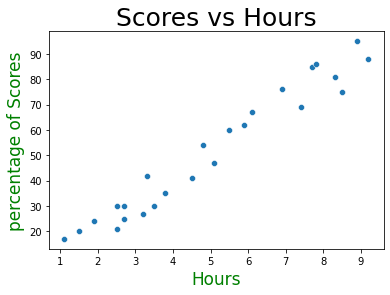

In [6]:
#visualizing data  scores vs hours

sns.scatterplot(x= r_data['Hours'], y=r_data['Scores'])
plt.title('Scores vs Hours',size=25,color='Black')
plt.xlabel('Hours',size=17,color='Green')
plt.ylabel('percentage of Scores',size=17,color='Green')
plt.show()


### we can see from graph that there is a positive relation between percentage of scores vs hours

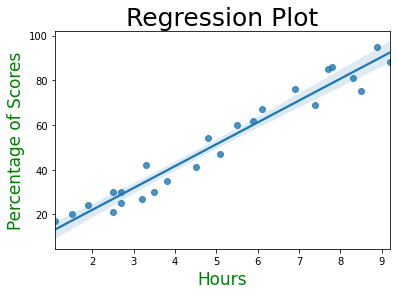

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [7]:
#lets plot regression line

sns.regplot(x= r_data['Hours'], y = r_data['Scores'])
plt.title('Regression Plot',size=25,color='Black')
plt.xlabel('Hours',size=17,color='Green')
plt.ylabel('Percentage of Scores',size=17,color='Green')
plt.show()
#correlation

print(r_data.corr())



#### from the above graph we can say that variables are positively correlated.

##### model training


In [39]:
#Defining variables Anad B from the Dataset

X = r_data.iloc[:, :-1].values  
Y = r_data.iloc[:, 1].values 
#Split the dataset into two parts
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,random_state=0) 

In [40]:
#data fitting in the model
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")


Training complete.


### Making Predictions


In [41]:
#making predictions

print(X_test) #in hours

Y_predi = regressor.predict(X_test) #predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


In [44]:

#comparing actual vs predicted
df = pd.DataFrame({'Actual':Y_test, 'Predicted':Y_predi})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


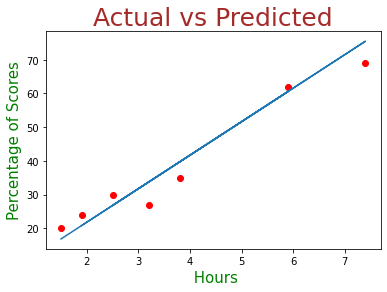

In [50]:
#comparing actual vs predicted 

plt.scatter(x= X_test, y=Y_test , color='Red')

plt.plot(X_test ,Y_predi)
plt.title('Actual vs Predicted', size=25,color="Brown")
plt.ylabel('Percentage of Scores', size=15,color="Green")
plt.xlabel(' Hours', size=15,color="Green")

plt.show()

### what will be predicted score if a student studies for 9.25 hrs per day?

In [53]:
hours = [9.25]

answer = regressor.predict([hours])

print("Score : {}".format(round(answer[0],4)))

Score : 93.8927


### according to regression model ,if a student studies for 9.25 hours per day then the student is likely to score 93.8927 marks.